#Loading Data

In [1]:
import pandas as pd

df = pd.read_csv("/content/HeartDisease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [2]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


#EDA

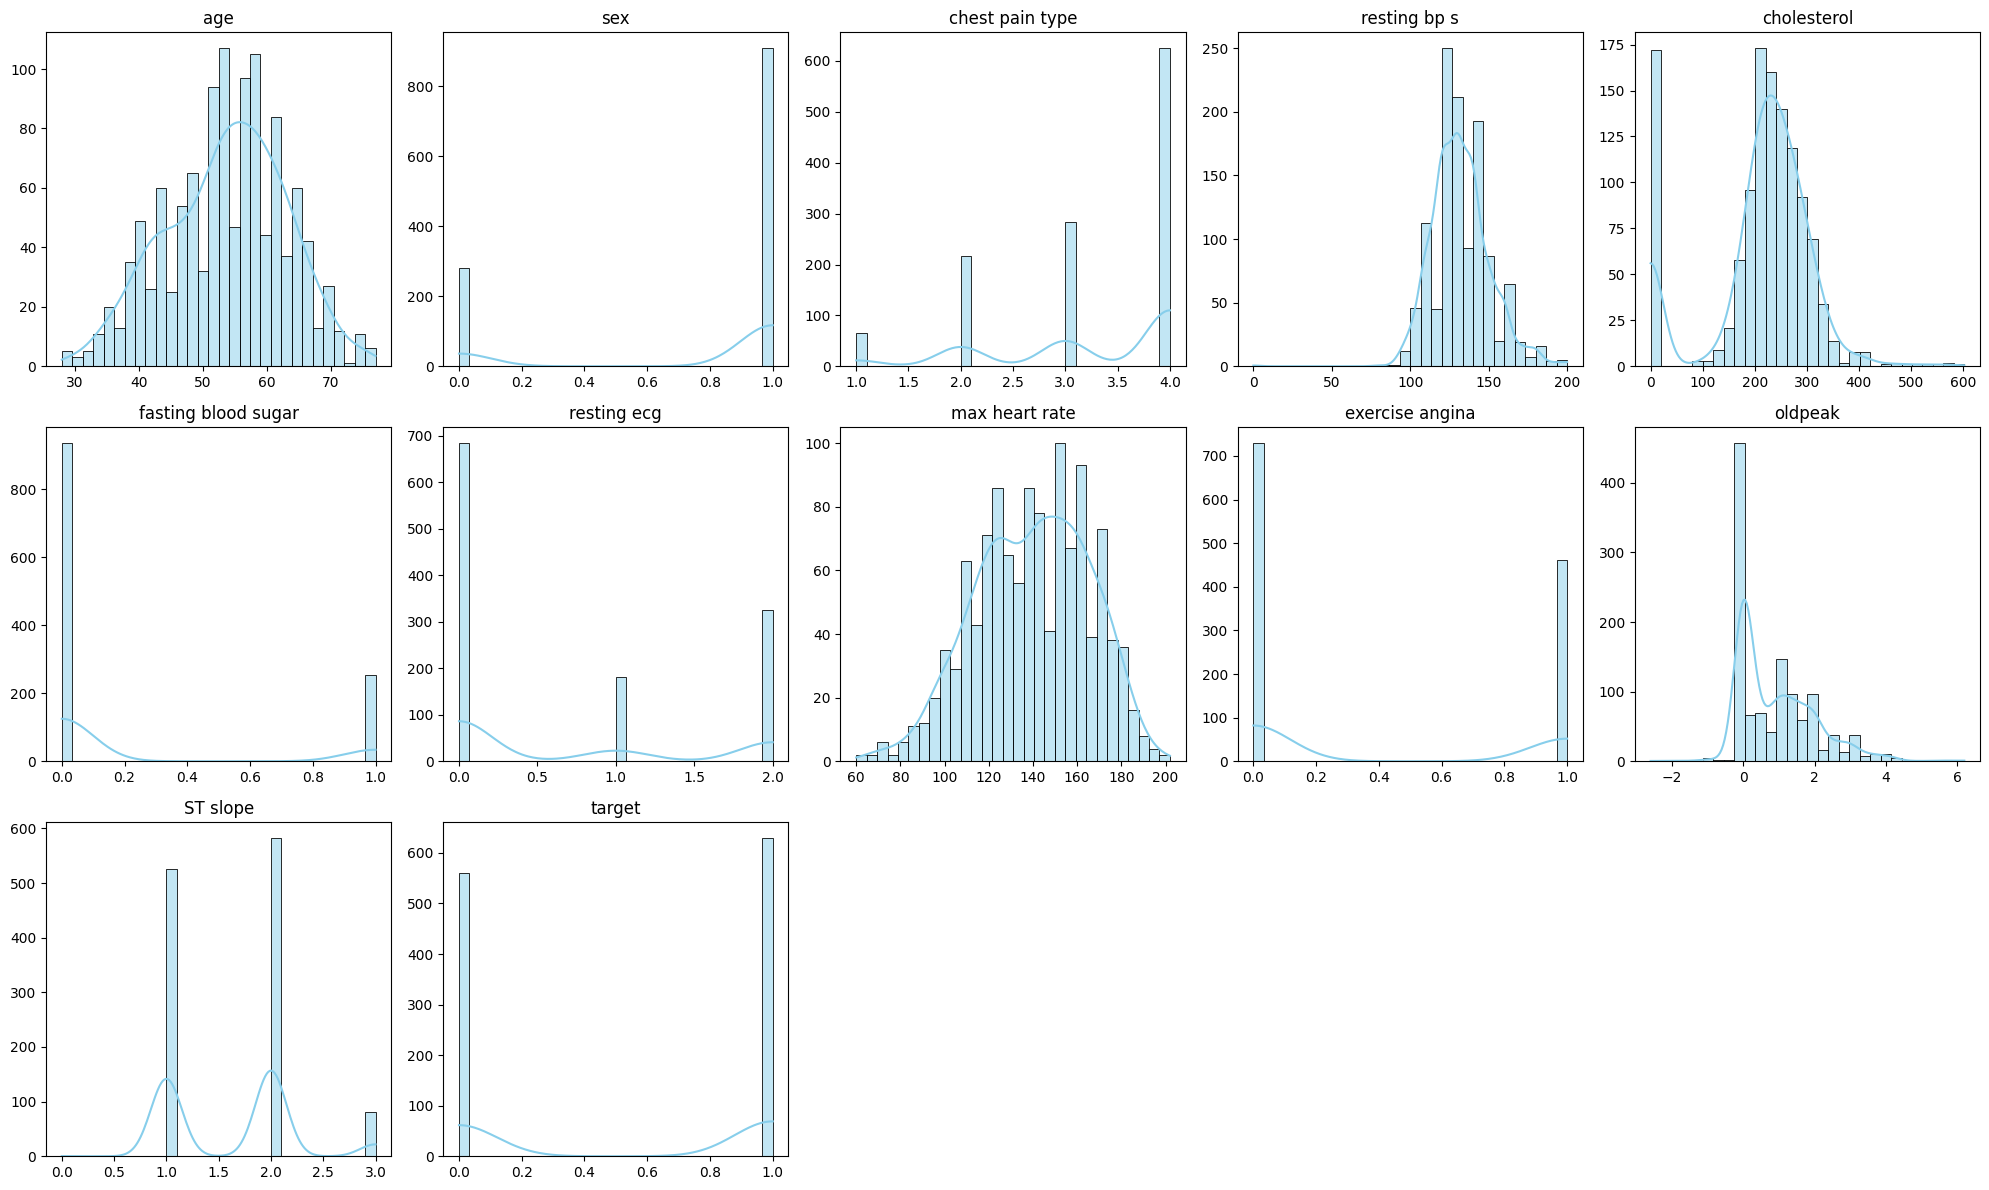

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


numerical_columns = df.columns

num_features = len(numerical_columns)
cols = 5
rows = (num_features + cols - 1) // cols  # Calculate number of rows needed

plt.figure(figsize=(20, 4 * rows))  # Adjust the overall size

for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


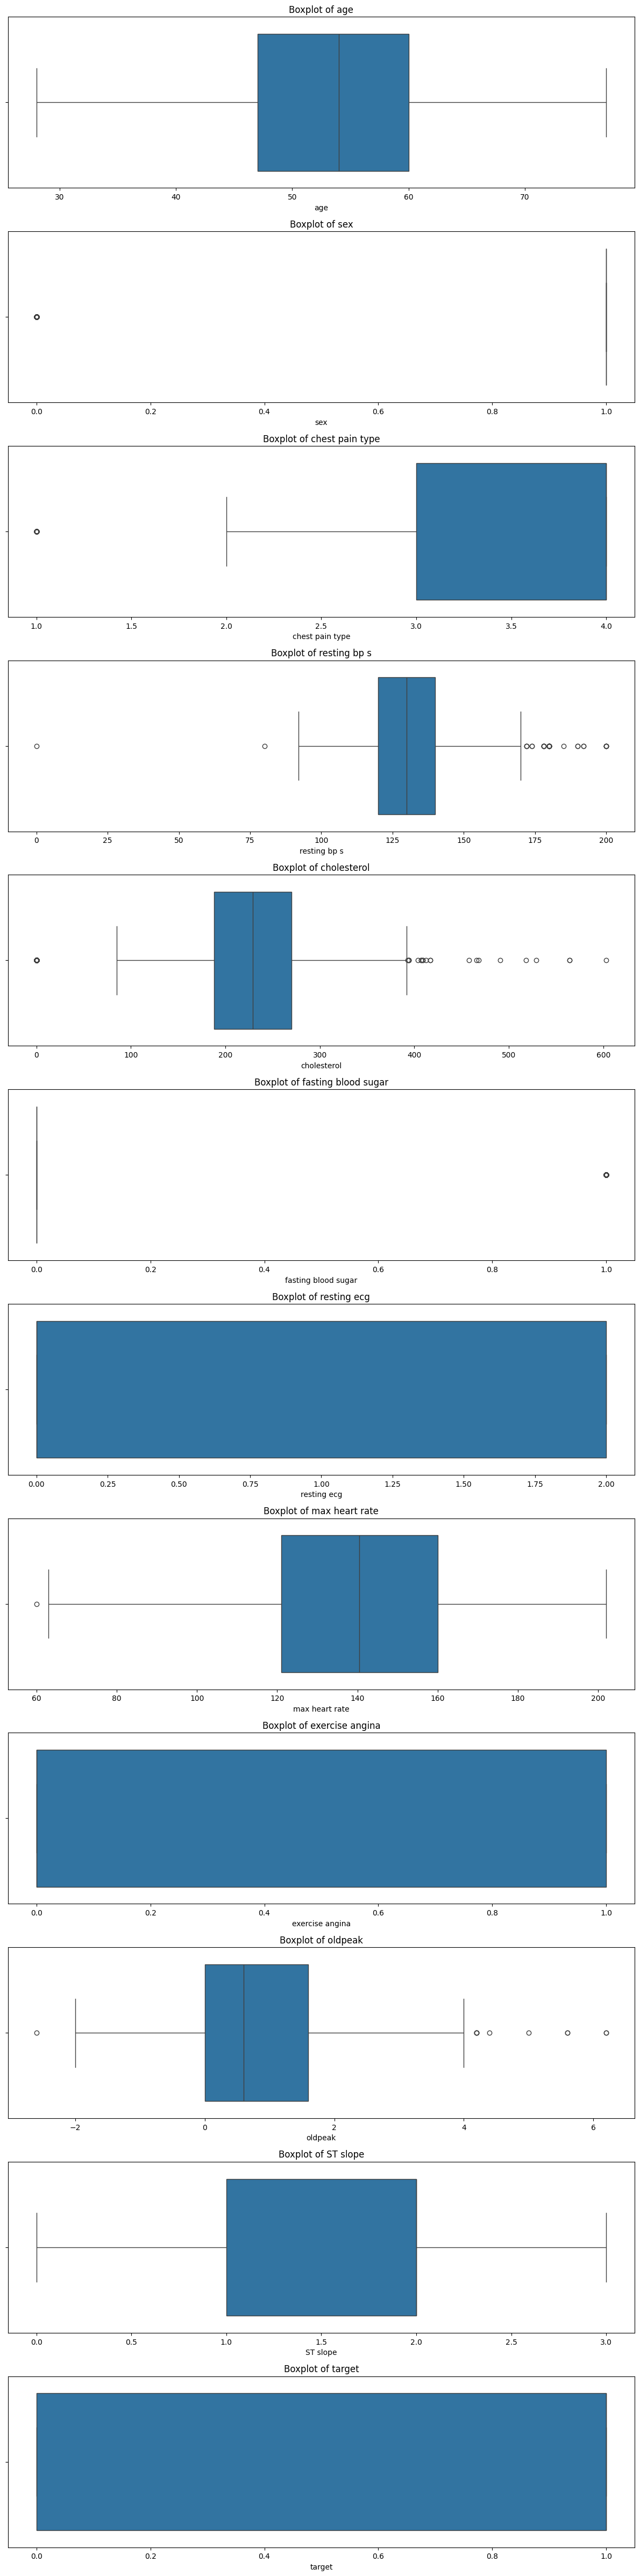

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_boxplots(data):

    numerical_columns = df.columns
    plt.figure(figsize=(12, len(numerical_columns) * 4))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 1, i)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

generate_boxplots(df)


#Addressing Outliers

<ipython-input-5-ff8a3c1f5e79>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


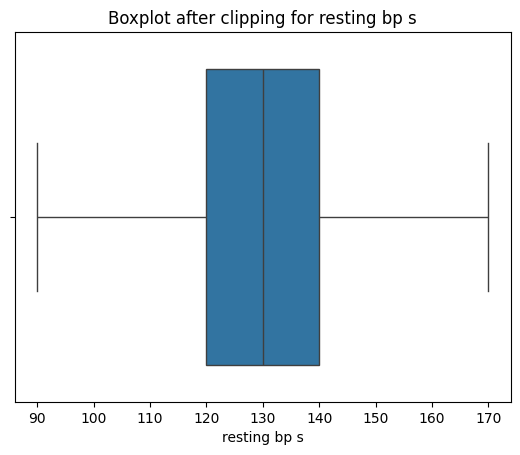

<ipython-input-5-ff8a3c1f5e79>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


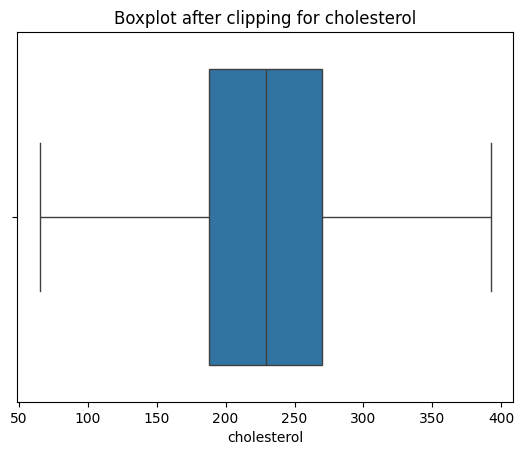

<ipython-input-5-ff8a3c1f5e79>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


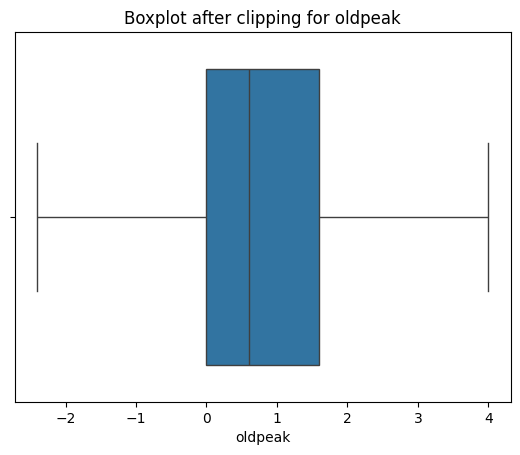

<ipython-input-5-ff8a3c1f5e79>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


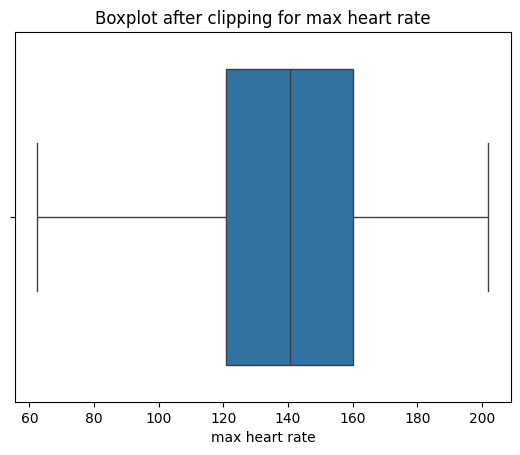

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def addressing_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


    sns.boxplot(x=df[col])
    plt.title(f"Boxplot after clipping for {col}")
    plt.show()

    return df


num_df = df[['resting bp s', 'cholesterol', 'oldpeak', 'max heart rate']]


for col in num_df.columns:
    num_df = addressing_outliers(num_df, col)


df[['resting bp s', 'cholesterol', 'oldpeak', 'max heart rate']] = num_df


#Visualizing Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

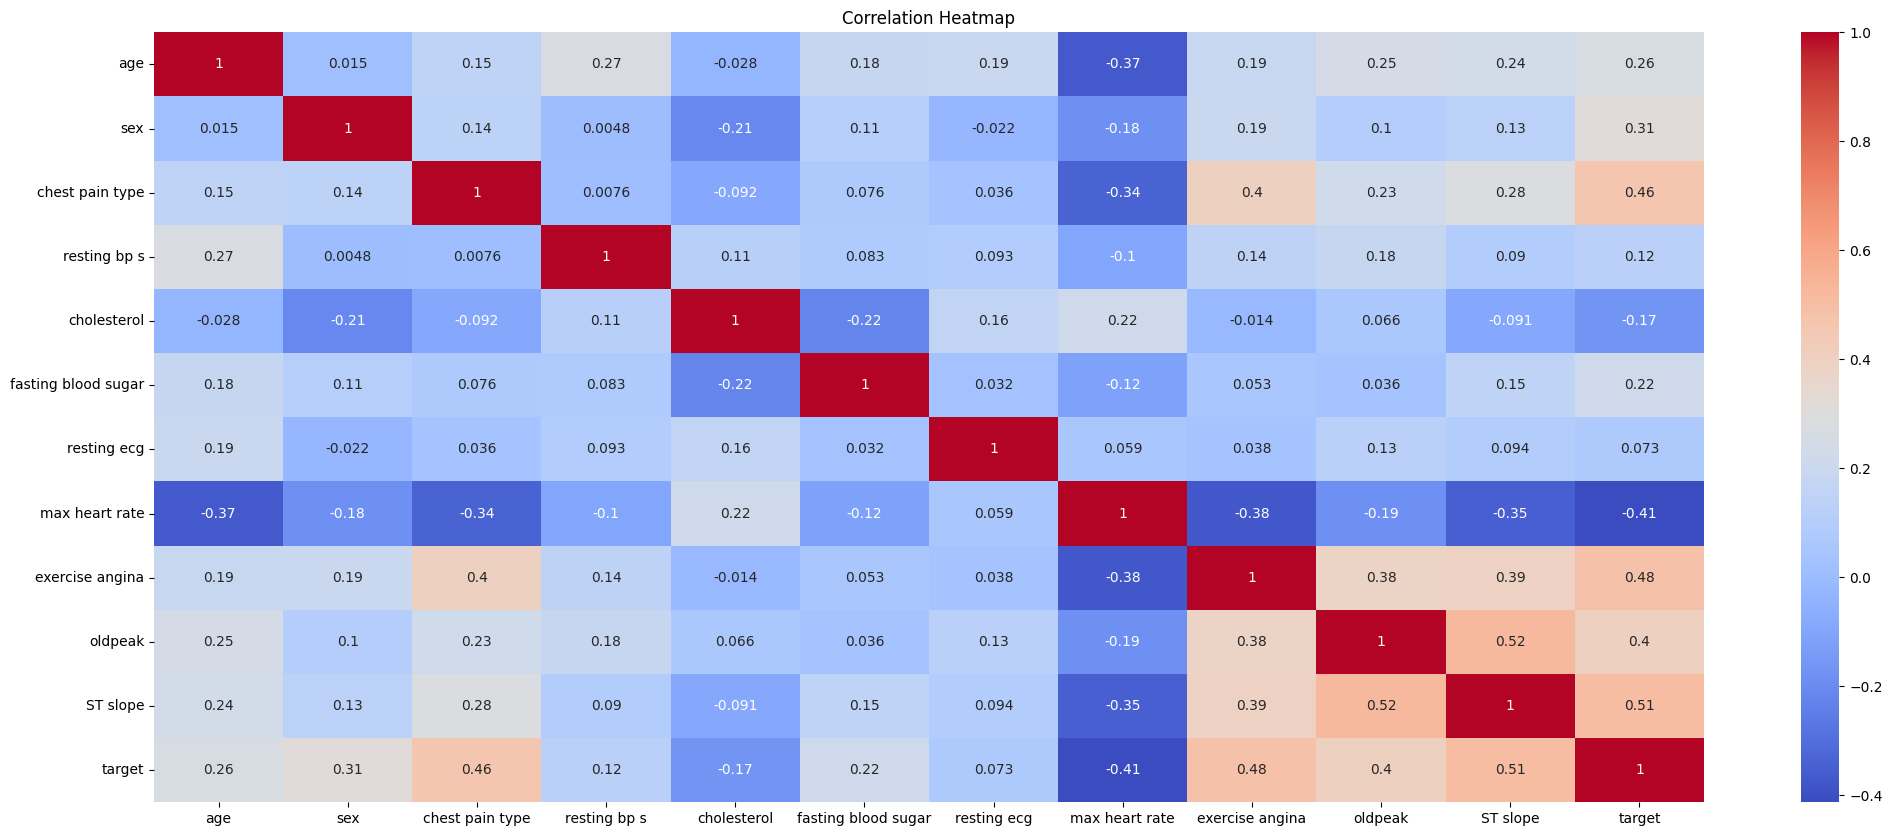

In [6]:
numerical_df = df.select_dtypes(include=["number"])
corr=numerical_df.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

#Splitting dataset and Implementing ML models

In [7]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer



X = df.drop(columns=['target'])
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x=X_scaled

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, shuffle=True, random_state=42)


# Gaussian Naive Baiyes

Accuracy: 0.8490
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       129
           1       0.86      0.88      0.87       169

    accuracy                           0.85       298
   macro avg       0.85      0.84      0.85       298
weighted avg       0.85      0.85      0.85       298

Cross-Validation Accuracy: 0.8387



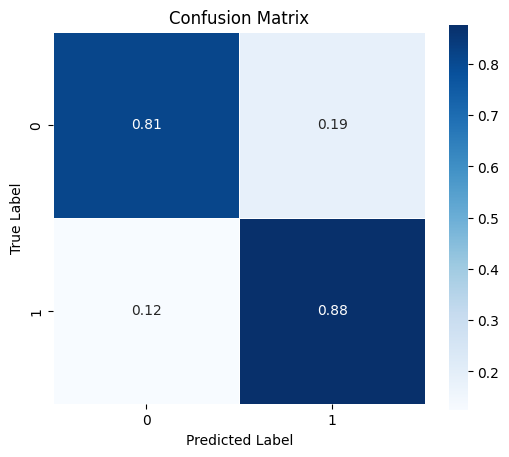

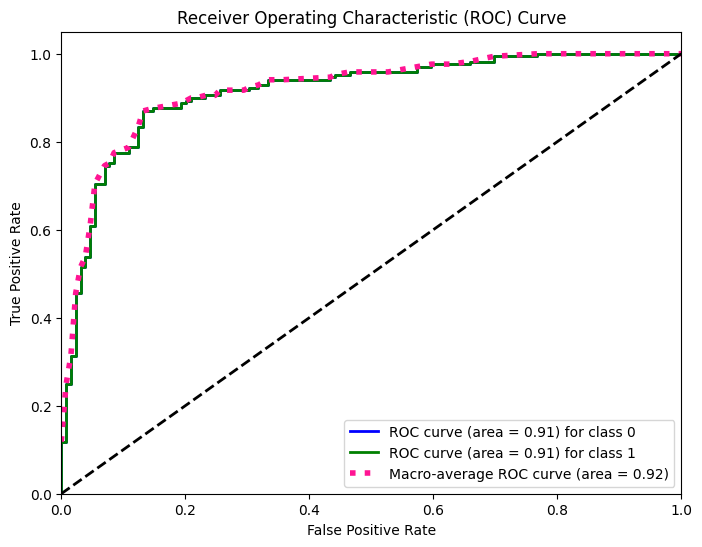

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = GaussianNB()
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# RandomForestClassifier


Accuracy: 0.9362
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       129
           1       0.94      0.95      0.94       169

    accuracy                           0.94       298
   macro avg       0.94      0.93      0.93       298
weighted avg       0.94      0.94      0.94       298

Cross-Validation Accuracy: 0.9420



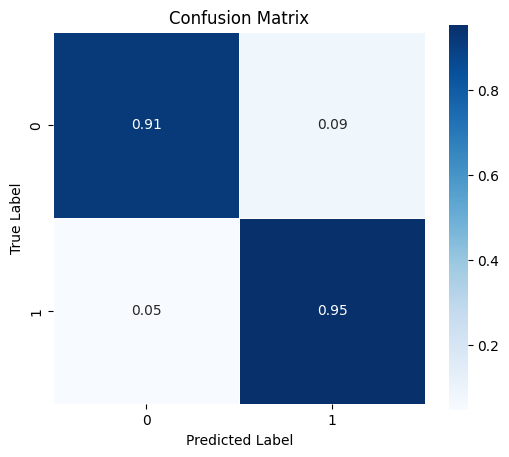

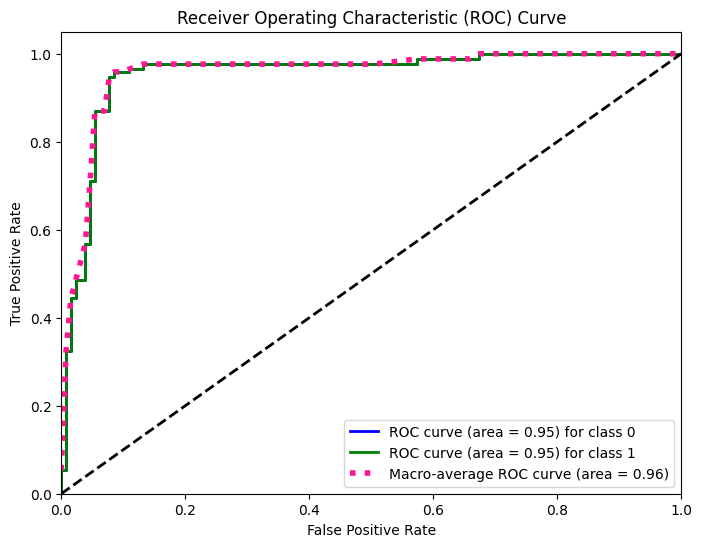

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=4)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# DecisionTreeClassifie

Accuracy: 0.8826
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       129
           1       0.90      0.89      0.90       169

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298

Cross-Validation Accuracy: 0.8824



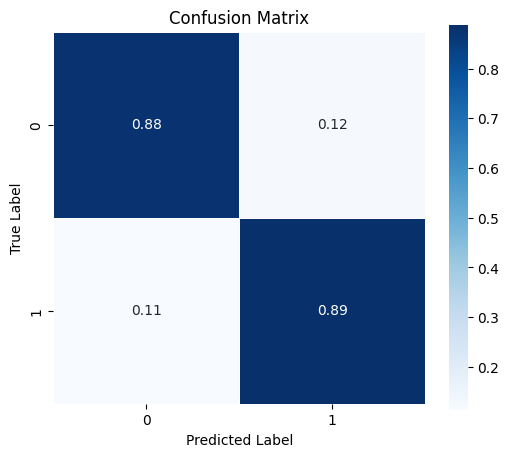

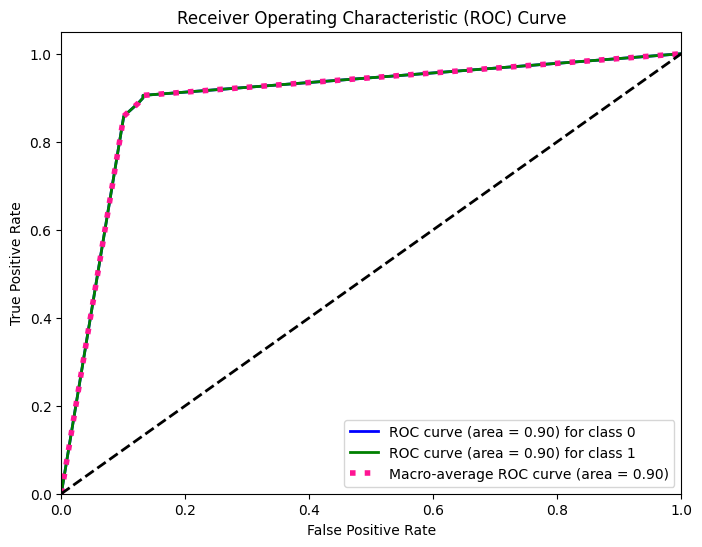

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = DecisionTreeClassifier( criterion='entropy', min_samples_split=4)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#KNeighborsClassifier

Accuracy: 0.8658
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       129
           1       0.86      0.91      0.88       169

    accuracy                           0.87       298
   macro avg       0.87      0.86      0.86       298
weighted avg       0.87      0.87      0.87       298

Cross-Validation Accuracy: 0.8630



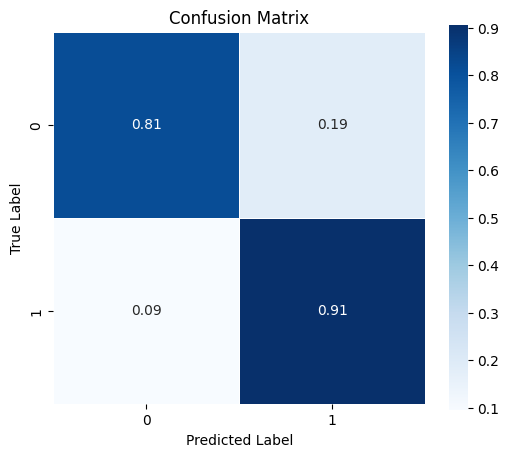

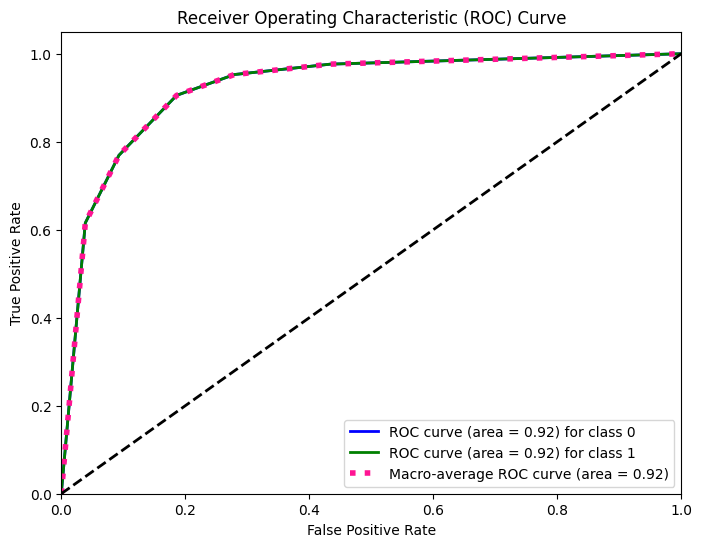

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = KNeighborsClassifier(n_neighbors=5, leaf_size=3)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#LogisticRegression


Accuracy: 0.8523
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       129
           1       0.87      0.88      0.87       169

    accuracy                           0.85       298
   macro avg       0.85      0.85      0.85       298
weighted avg       0.85      0.85      0.85       298

Cross-Validation Accuracy: 0.8261



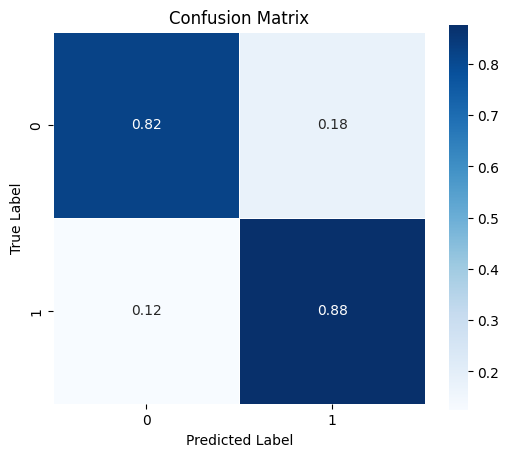

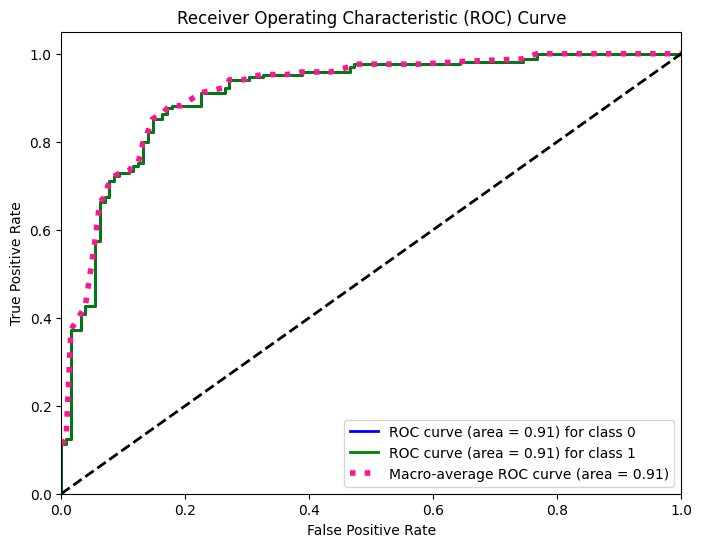

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = LogisticRegression( penalty='l2',solver="newton-cg")
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#Support Vector Machine

Accuracy: 0.8758
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.91      0.87      0.89       169

    accuracy                           0.88       298
   macro avg       0.87      0.88      0.87       298
weighted avg       0.88      0.88      0.88       298

Cross-Validation Accuracy: 0.8807



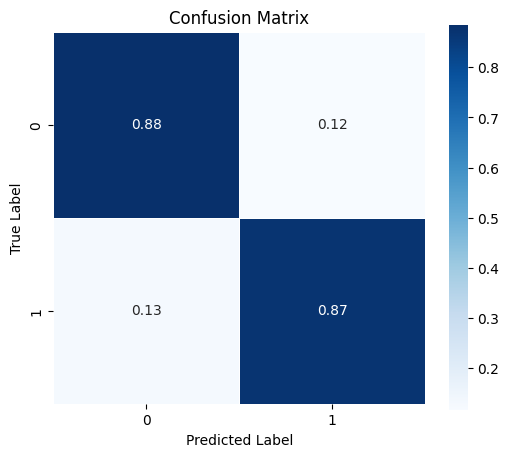

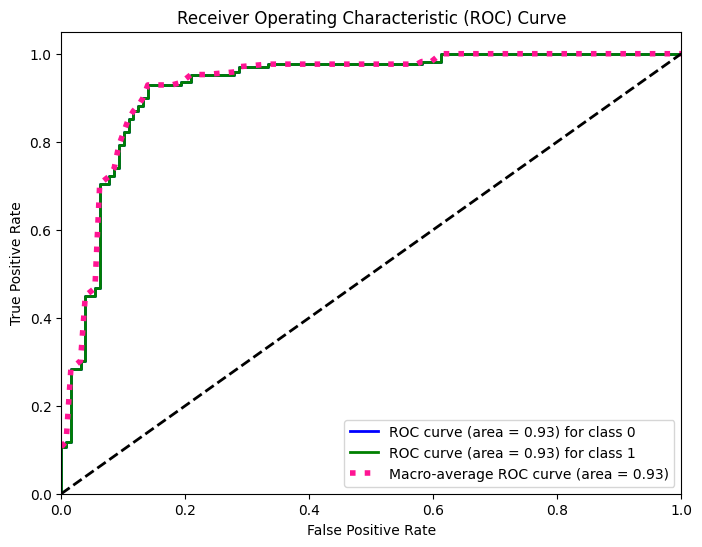

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_model = SVC(kernel='rbf', C=10.0,probability=True)  # You can change kernel to 'linear', 'poly', or 'sigmoid'


rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#AdaBoostClassifier

Accuracy: 0.8758
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       129
           1       0.88      0.90      0.89       169

    accuracy                           0.88       298
   macro avg       0.87      0.87      0.87       298
weighted avg       0.88      0.88      0.88       298

Cross-Validation Accuracy: 0.8563



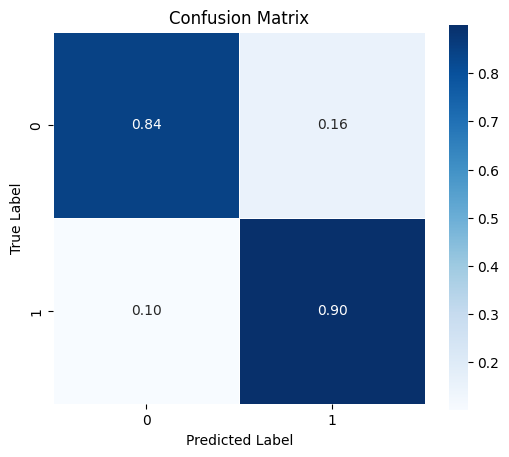

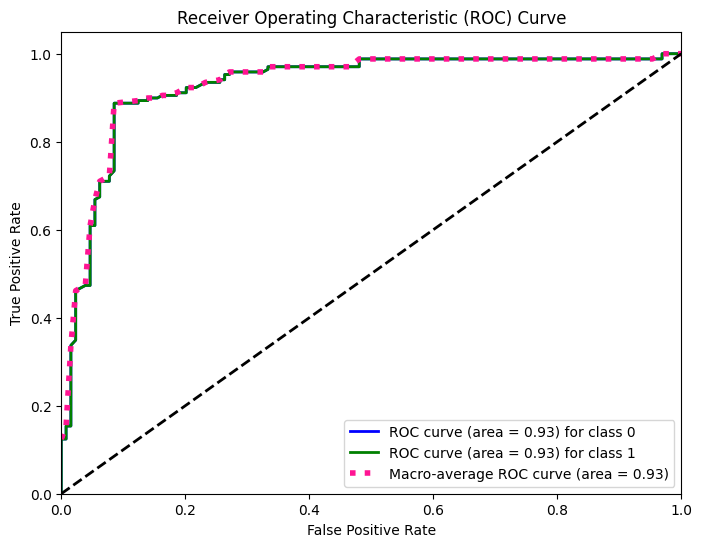

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer



rf_model = AdaBoostClassifier( n_estimators=300, learning_rate=0.25)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()

y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]


class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names)


lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#VotingClassifier(SVM, RandomForestClassifier, KNeighborsClassifier)


Accuracy: 0.9195
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       129
           1       0.92      0.94      0.93       169

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298

Cross-Validation Accuracy: 0.9059



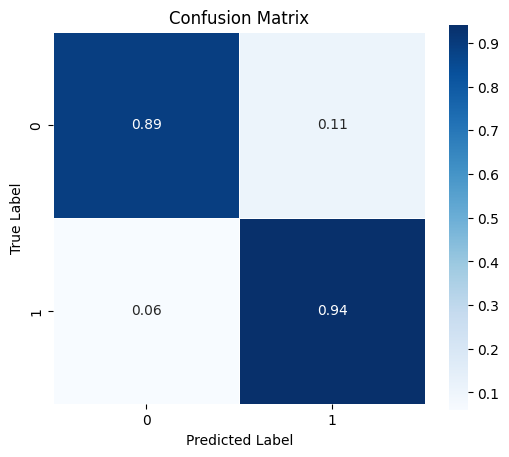

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier




model1 = SVC(kernel='rbf', C=10.0,probability=True)
model2 = RandomForestClassifier(n_estimators=350, min_samples_split=4)
model3 =  KNeighborsClassifier(n_neighbors=5, leaf_size=3)



voting_clf = VotingClassifier(
    estimators=[('SVC', model1), ('Rf', model2), ('Kn', model3)],
    voting='hard'
)


voting_clf.fit(x_train, y_train)


y_pred = voting_clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(voting_clf, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()



class_names = np.unique(y)


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


class_names = np.unique(y)
plot_confusion_matrix(y_test, y_pred, class_names)



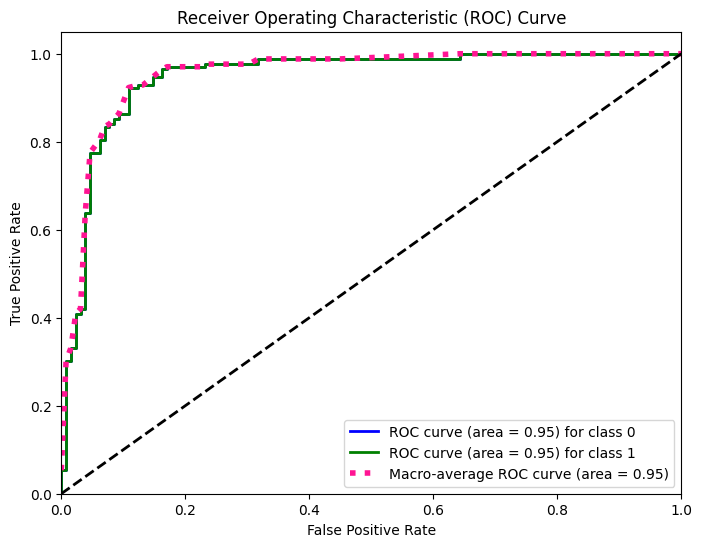

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import numpy as np

def voting_predict_proba(voting_clf, X):
    """
    Returns the average predicted probability of the positive class
    using soft voting from all classifiers in the voting ensemble.

    Parameters:
    - voting_clf: VotingClassifier (fitted)
    - X: Test data (numpy array or pandas DataFrame)

    Returns:
    - Averaged probabilities for class 1 (positive class)
    """
    probas = [clf.predict_proba(X)[:, 1] for clf in voting_clf.estimators_]
    avg_proba = np.mean(probas, axis=0)
    return avg_proba



# Function to plot ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
fpr, tpr, roc_auc = {}, {}, {}


for i in range(len(class_names)):
  y_test_bin = y_test_bin.reshape(-1, 1)
  fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_probs)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)
fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {class_names[i]}')

plt.plot(fpr['macro'], tpr['macro'], color='deeppink', linestyle=':', linewidth=4,
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



#Feature Selection

<ipython-input-56-6f8068122454>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


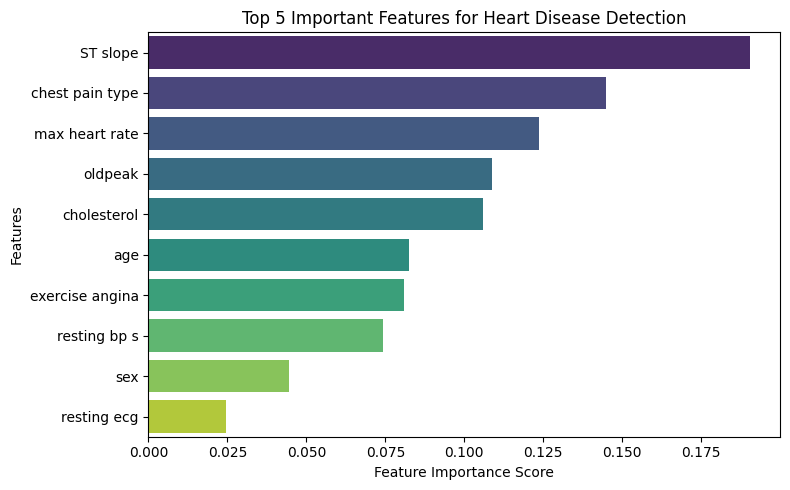

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X = df.drop(columns='target')
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


rf = RandomForestClassifier(n_estimators=500,  min_samples_split=4)
rf.fit(X_scaled_df, y)


importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Important Features for Heart Disease Detection') ## Showing all features, not top 5.
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Accuracy with Top 5 Features: 0.9027

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       129
           1       0.89      0.94      0.92       169

    accuracy                           0.90       298
   macro avg       0.90      0.90      0.90       298
weighted avg       0.90      0.90      0.90       298

Cross-Validation Accuracy: 0.9294



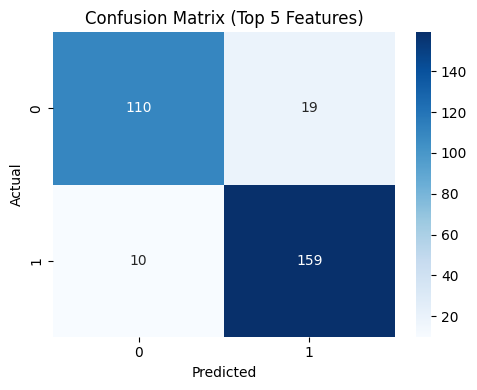

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

top_5_features = top_features['Feature'].head(5).tolist()

X_top5 = X_scaled_df[top_5_features]


X_train, X_test, y_train, y_test = train_test_split(X_top5, y, test_size=0.25, random_state=42)


rf_top5 = RandomForestClassifier(n_estimators=500, min_samples_split=4, random_state=42)
rf_top5.fit(X_train, y_train)


y_pred = rf_top5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Top 5 Features: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = cross_val_score(rf_model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
print()


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Top 5 Features)')
plt.tight_layout()
plt.show()

